In [37]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
#open and load csv data into df, create graph
df = pd.read_csv('classic_rock_playlist.csv')

G = nx.from_pandas_edgelist(df, source='Artist', target='Music')

In [38]:
#data cleaning.. removing empty and duplicate values
df.dropna

df.drop_duplicates(subset=['Music']

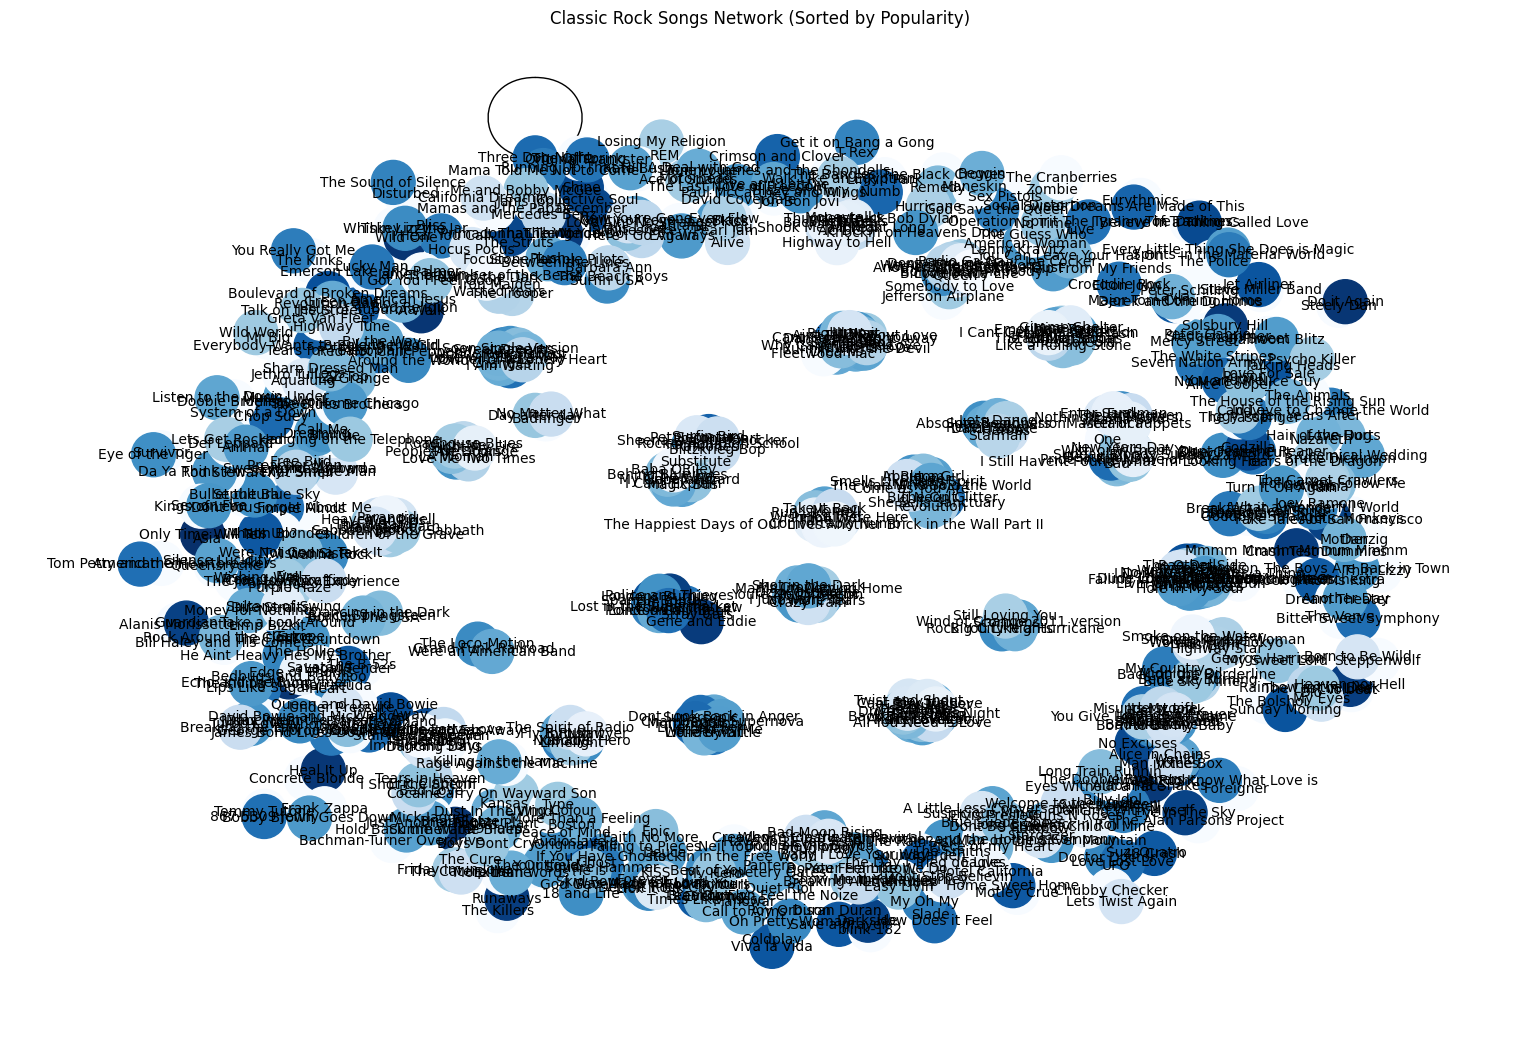

In [39]:
#define the columns containing rankings (years)
ranking_columns = ['2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015']

#calculate popularity of songs based on rankings
song_popularity = {}
for index, row in df.iterrows():
    song = row['Music']
    total_rank = 0
    count_rank = 0
    for column in ranking_columns:
        if pd.notna(row[column]):  #check if the cell is not empty
            total_rank += row[column]
            count_rank += 1
    if count_rank > 0:
        average_rank = total_rank / count_rank
        song_popularity[song] = average_rank

###

#assigns shades to songs based on popularity
node_colors = [song_popularity.get(music, 0) for music in G.nodes()]

#visualize the overall network
# After drawing the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, with_labels=True, node_size=1000, node_color=node_colors, cmap=plt.cm.Blues, font_size=10)
plt.title("Classic Rock Songs Network (Sorted by Popularity)")

plt.show()



In [40]:
#calculating centrality and identifying top influential artists
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
eigenvector_centrality = nx.eigenvector_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
pagerank = nx.pagerank(G)

top_degree_centrality = sorted(degree_centrality, key=degree_centrality.get, reverse=True)[:5]
top_betweenness_centrality = sorted(betweenness_centrality, key=betweenness_centrality.get, reverse=True)[:5]
top_eigenvector_centrality = sorted(eigenvector_centrality, key=eigenvector_centrality.get, reverse=True)[:5]
top_closeness_centrality = sorted(closeness_centrality, key=closeness_centrality.get, reverse=True)[:5]
top_pagerank = sorted(pagerank, key=pagerank.get, reverse=True)[:5]

print("Top Artists by Degree Centrality:", top_degree_centrality)
print("Top Artists by Betweenness Centrality:", top_betweenness_centrality)
print("Top Artists by Eigenvector Centrality:", top_eigenvector_centrality)
print("Top Artists by Closeness Centrality:", top_closeness_centrality)
print("Top Artists by PageRank:", top_pagerank)

Top Artists by Degree Centrality: ['Aerosmith', 'The Beatles', 'Bon Jovi', 'Van Halen', 'The Rolling Stones']
Top Artists by Betweenness Centrality: ['Aerosmith', 'The Beatles', 'Van Halen', 'Ramones', 'U2']
Top Artists by Eigenvector Centrality: ['Aerosmith', 'Dream On', 'The Other Side', 'What it Takes', 'Rag Doll']
Top Artists by Closeness Centrality: ['Aerosmith', 'The Beatles', 'Van Halen', 'Bon Jovi', 'The Rolling Stones']
Top Artists by PageRank: ['Aerosmith', 'The Beatles', 'Bon Jovi', 'Van Halen', 'The Rolling Stones']


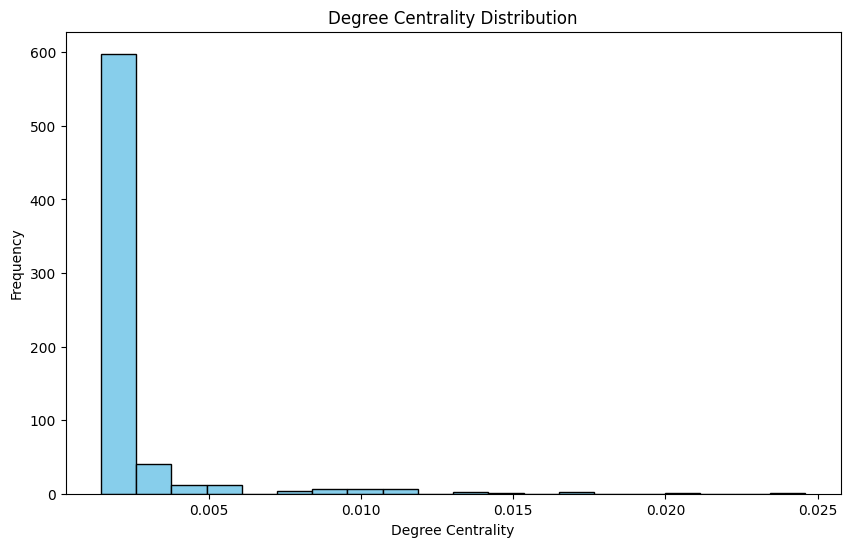

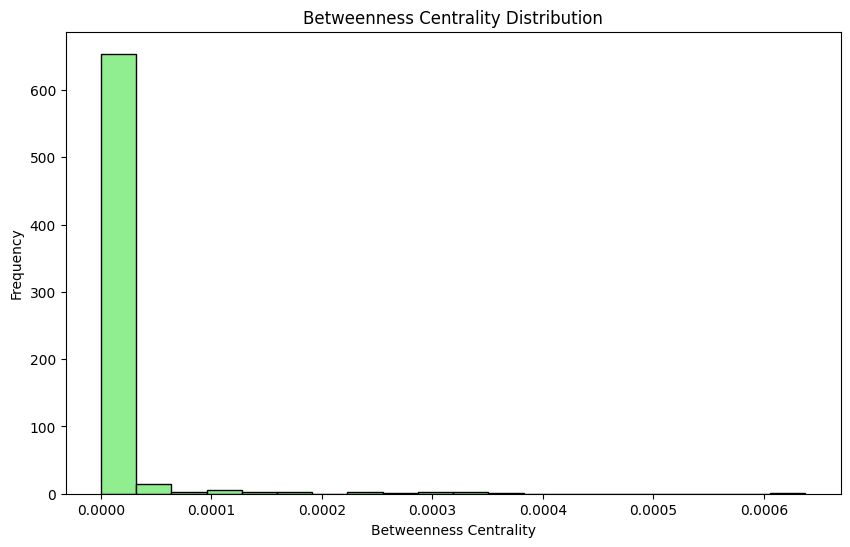

In [41]:
# Plot degree centrality distribution
plt.figure(figsize=(10, 6))
plt.hist(list(degree_centrality.values()), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')
plt.title('Degree Centrality Distribution')
plt.show()

# Plot betweenness centrality distribution
plt.figure(figsize=(10, 6))
plt.hist(list(betweenness_centrality.values()), bins=20, color='lightgreen', edgecolor='black')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')
plt.title('Betweenness Centrality Distribution')
plt.show()
